In [4]:
pip install tensorly


The following command must be run outside of the IPython shell:

    $ pip install tensorly

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

import json
import tensorly as tl
%matplotlib inline

ModuleNotFoundError: No module named 'tensorly'

In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '15'}
plt.rc('font', **font)               # 步骤一（设置字体的更多属性）
plt.rc('axes', unicode_minus=False)  # 步骤二（解决坐标轴负数的负号显示问题）

# 载入张量回归模型观察模型参数

In [7]:
# 从json文件读取
index=0
submit = './张量回归参数_wnn/result_SEV.json'
with open(submit, "r") as f:
    json_dict = json.load(f)
    
dist=json_dict['dist'][index]
G=np.array(json_dict['G'][index])
B1=np.array(json_dict['B1'][index])
B2=np.array(json_dict['B2'][index])
alpha=json_dict['alpha'][index]
sigma=json_dict['sigma'][index]

print(json_dict['BIC'][index])

295.374335552773


In [10]:
B=tl.tucker_to_tensor((G,[B1,B2]))

<AxesSubplot:>

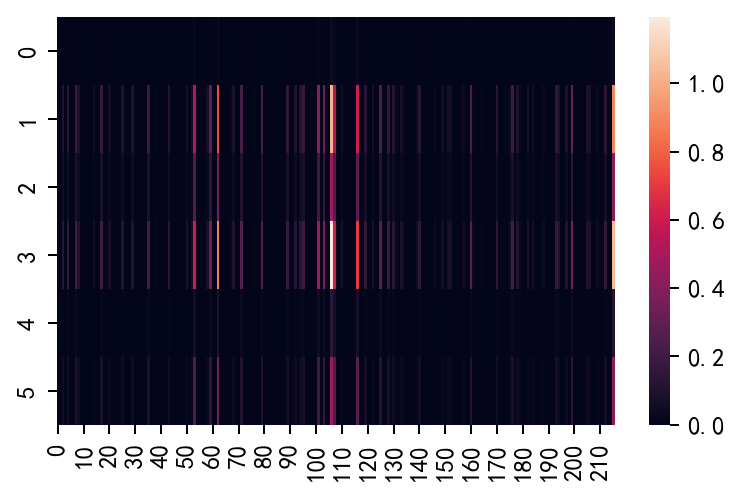

In [21]:
import seaborn as sns
plt.figure(figsize=(5,3),dpi=180)
sns.heatmap(abs(B))

In [17]:
B

array([[-2.96691062e-12,  1.06343405e-10,  4.32447575e-03, ...,
        -3.55973608e-11, -9.68938227e-10, -3.51325190e-02],
       [-7.50524450e-11,  2.69011561e-09,  1.09394087e-01, ...,
        -9.00488523e-10, -2.45107427e-08, -8.88729654e-01],
       [ 3.55036754e-11, -1.27256336e-09, -5.17490423e-02, ...,
         4.25977491e-10,  1.15948448e-08,  4.20414940e-01],
       [ 8.76497684e-11, -3.14164329e-09, -1.27755550e-01, ...,
         1.05163277e-09,  2.86247960e-08,  1.03790021e+00],
       [ 9.81106523e-12, -3.51659425e-10, -1.43003006e-02, ...,
         1.17714375e-10,  3.20411275e-09,  1.16177223e-01],
       [-3.45471802e-11,  1.23827956e-09,  5.03548849e-02, ...,
        -4.14501343e-10, -1.12824712e-08, -4.09088651e-01]])

# 分析HI和特征的相关性 不同机器同特征纵向对比

载入数据 周期平均

In [9]:
machine_total=np.array(['正常_R065','正常_R667','不确定_R397','早期_R521',
               '轻微_R048','故障_R072','故障_R368','故障_R419','故障_R396','故障_R420','故障_R085'])
HI_total=np.array([1,0.97886202,0.893528733,0.866090481,0.756001069,0.694213365,0.471909182,0.79511639,0.356578674,0.347377163,0.83559442])
features=[]
for machine in machine_total:
    data=np.load(machine+'_电流.npz')['rotate_feas']
    data=data.mean(axis=0).reshape(1,-1)
    features.append(data)
features=np.vstack(features)

In [10]:
features

array([[4.08829649e-03, 8.62269664e-02, 7.12613146e-02, ...,
        5.97555058e-02, 1.02349443e+00, 1.35736695e-01],
       [6.61370847e-03, 8.43353732e-02, 4.09152220e-02, ...,
        4.13558293e-02, 1.02082265e+00, 5.98682584e-02],
       [1.14307574e-02, 8.55642793e-02, 1.97155491e-04, ...,
        3.74702070e-02, 1.02761456e+00, 5.47682918e-02],
       ...,
       [5.69691255e-03, 6.78648445e-02, 8.60949416e-02, ...,
        3.49104725e-02, 1.05331115e+00, 4.75340760e-02],
       [7.20083846e-03, 7.14197071e-02, 4.91586615e-02, ...,
        3.35853475e-02, 1.07380061e+00, 4.40182369e-02],
       [1.65553778e-02, 9.62003908e-02, 1.14428276e-02, ...,
        5.55942448e-02, 1.04431013e+00, 1.08184481e-01]])

计算相关性

In [11]:
HI_total=np.array(HI_total)
corr=[]
for i in range(features.shape[-1]):
    corr.append(np.corrcoef(HI_total,features[:,i])[0][1])
corr=np.array(corr)
corr_order=np.abs(corr).argsort()[::-1]

载入周期的数据

In [12]:
features_circle=[]
for machine in machine_total:
    data=np.load(machine+'_电流.npz')['rotate_feas']
    data=data.reshape(data.shape[0],-1)
    features_circle.append(data)

index转对应特征函数

In [13]:
def index_convert(index):
    stage_name=['加速',"匀速","减速"]
    fea_name=['峰度','标准差','峰值因子',"偏度","脉冲因子","峰峰值","均方根","波形因数","能量"]
   
    joint=index//216+1  # [1,6]
    motion=(index%216)//27+1 # start from 1
    stage=stage_name[((index%216)%27)//9]
    fea=fea_name[((index%216)%27)%9]
    return [joint,motion,stage,fea]

In [14]:
def convert_index(joint,motion,stage,fea): #start from 1
    index=(joint-1)*216+(motion-1)*27+(stage-1)*9+(fea-1)
    return index

绘图

AttributeError: Unknown property fontdict

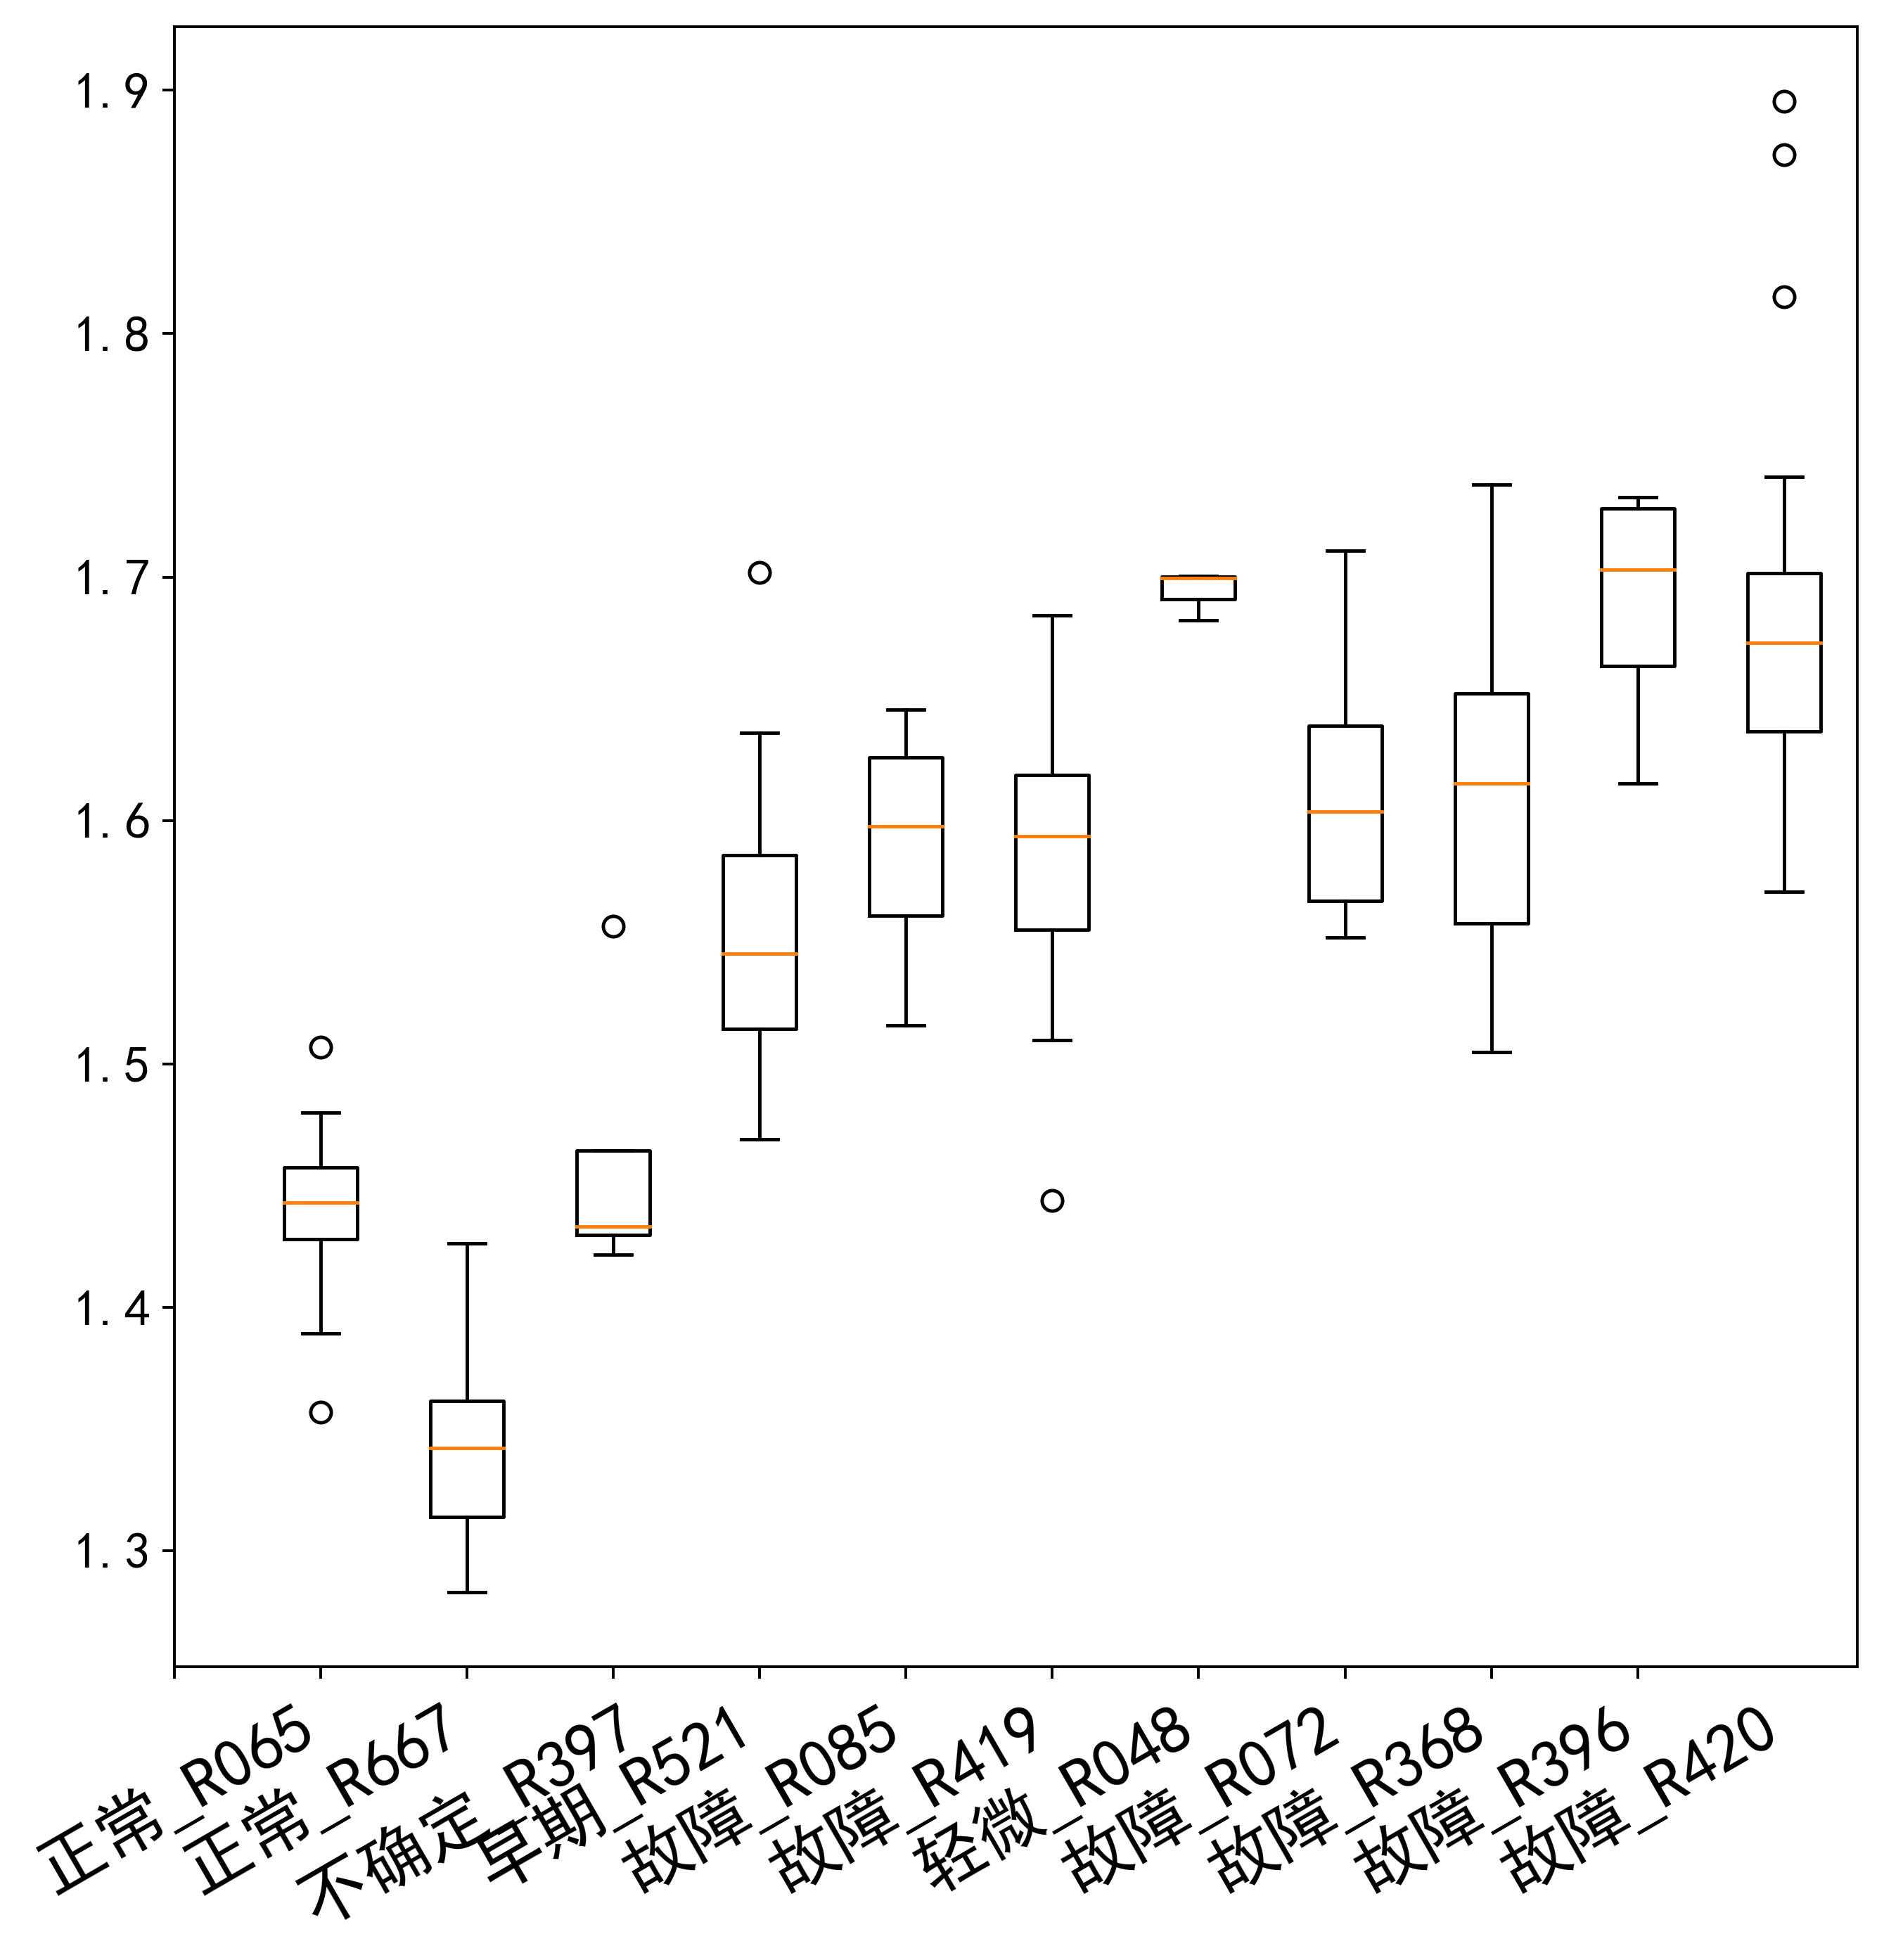

In [15]:
HI_order=HI_total.argsort()[::-1]
stage_name=['加速',"匀速","减速"]
fea_name=['峰度','标准差','峰值因子',"偏度","脉冲因子","峰峰值","均方根","波形因数","能量"]

rank=5
# 展示前5个最相关的特征
plt.figure(figsize=(30,30),dpi=350)
for i in range(rank):
    data_plot=[features_circle[HI_order[m]][:,corr_order[i]] for m in range(len(HI_total))]
    plt.subplot(int(np.ceil(np.sqrt(rank))),int(np.ceil(np.sqrt(rank))),i+1)
    plt.boxplot(data_plot, labels = [machine_total[HI_order[m]] for m in range(len(HI_total))])
    plt.xticks(np.arange(len(HI_order)),[machine_total[HI_order[m]] for m in range(len(HI_total))],
              fontdict={"family": "SimHei", "size": 20, "color": "black"},rotation=30)
    plt.title("corr:{},joint:{}, motion:{}, stage：{},fea:{}".format(
        corr[corr_order[i]],index_convert(corr_order[i])[0],index_convert(corr_order[i])[1],index_convert(corr_order[i])[2],index_convert(corr_order[i])[3]),
              fontdict={"family": "SimHei", "size": 20, "color": "black"})
   
plt.tight_layout()
# plt.savefig('./电流特征对比.png',transparent = False)
plt.show()

    结论：电流在各个子运动的变速、匀速中的统计特征可以体现退化，可以通过对其进行监控进行预警，比如找阈值、控制图等

# 同机器不同特征对比

In [12]:
machine_total=np.array(['正常_R065','正常_R667','不确定_R397','早期_R521','轻微_R048','故障_R072','故障_R368','故障_R419','故障_R396','故障_R420','故障_R085'])
HI_total=np.array([1,0.97886202,0.893528733,0.866090481,0.756001069,0.694213365,0.471909182,0.79511639,0.356578674,0.347377163,0.83559442])

machine_std='正常_R667'
machine_test='故障_R085'

fea_std=np.load(machine_std+'_电流.npz')['rotate_feas']
fea_std=fea_std.reshape(fea_std.shape[0],-1)
fea_test=np.load(machine_test+'_电流.npz')['rotate_feas']
fea_test=fea_test.reshape(fea_test.shape[0],-1)

rate=np.abs(np.mean(fea_test,axis=0)-np.mean(fea_std,axis=0))/np.abs(np.mean(fea_std,axis=0))
rate_order=rate.argsort()[::-1]

rank=9
for i in range(rank):
    print("rate:{},index：{}，joint:{}, motion:{}, stage：{},fea:{}".format(
        rate[rate_order[i]],rate_order[i],index_convert(rate_order[i])[0],index_convert(rate_order[i])[1],
        index_convert(rate_order[i])[2],index_convert(rate_order[i])[3]))

rate:8477.835388474836,index：155，joint:1, motion:6, stage：减速,fea:峰值因子
rate:1319.4527026138453,index：157，joint:1, motion:6, stage：减速,fea:脉冲因子
rate:1297.6435795557256,index：174，joint:1, motion:7, stage：匀速,fea:偏度
rate:770.1589070885315,index：1263，joint:6, motion:7, stage：减速,fea:偏度
rate:419.8194526179525,index：1260，joint:6, motion:7, stage：减速,fea:峰度
rate:392.84906760916397,index：171，joint:1, motion:7, stage：匀速,fea:峰度
rate:160.06308092908384,index：180，joint:1, motion:7, stage：减速,fea:峰度
rate:114.30283225090483,index：1251，joint:6, motion:7, stage：匀速,fea:峰度
rate:52.450867164066366,index：144，joint:1, motion:6, stage：匀速,fea:峰度


# 原始电流信号可视化

In [4]:
def index_convert(index):
    stage_name=['加速',"匀速","减速"]
    fea_name=['峰度','标准差','峰值因子',"偏度","脉冲因子","峰峰值","均方根","波形因数","能量"]

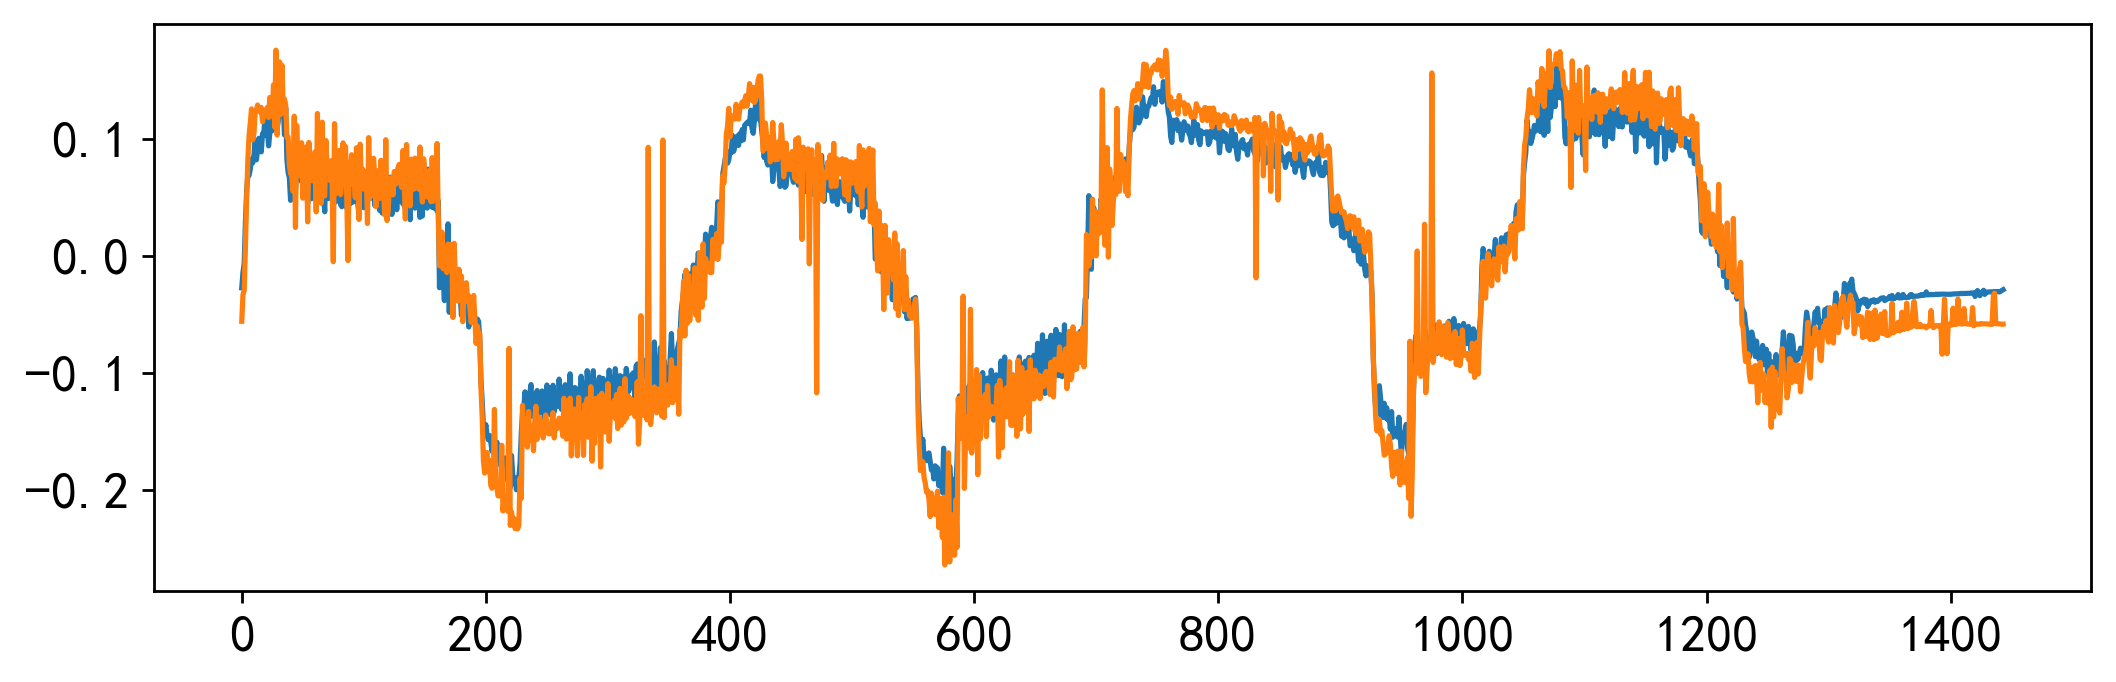

In [13]:
machine_total=np.array(['正常_R065','正常_R667','不确定_R397','早期_R521','轻微_R048','故障_R072','故障_R368','故障_R419','故障_R396','','故障_R085'])
machine_std='正常_R667'
machine_test='故障_R085'

data=np.load('转矩周期原始数据.npy',allow_pickle=True).item()
joint=3
current_std=data[machine_std+'_转矩'][0,joint,:]
current_test=data[machine_test+'_转矩'][0,joint,:]

plt.figure(figsize=(10,3),dpi=250)
plt.plot(current_std,label='std')
plt.plot(current_test,label='test')
plt.show()



# 特征可视化

In [14]:
%matplotlib inline

In [15]:
machine_total=np.array(['正常_R065','正常_R667','不确定_R397','早期_R521','轻微_R048','故障_R072','故障_R368','故障_R419','故障_R396','','故障_R085'])
machine_std='正常_R667'
machine_test='故障_R085'

180


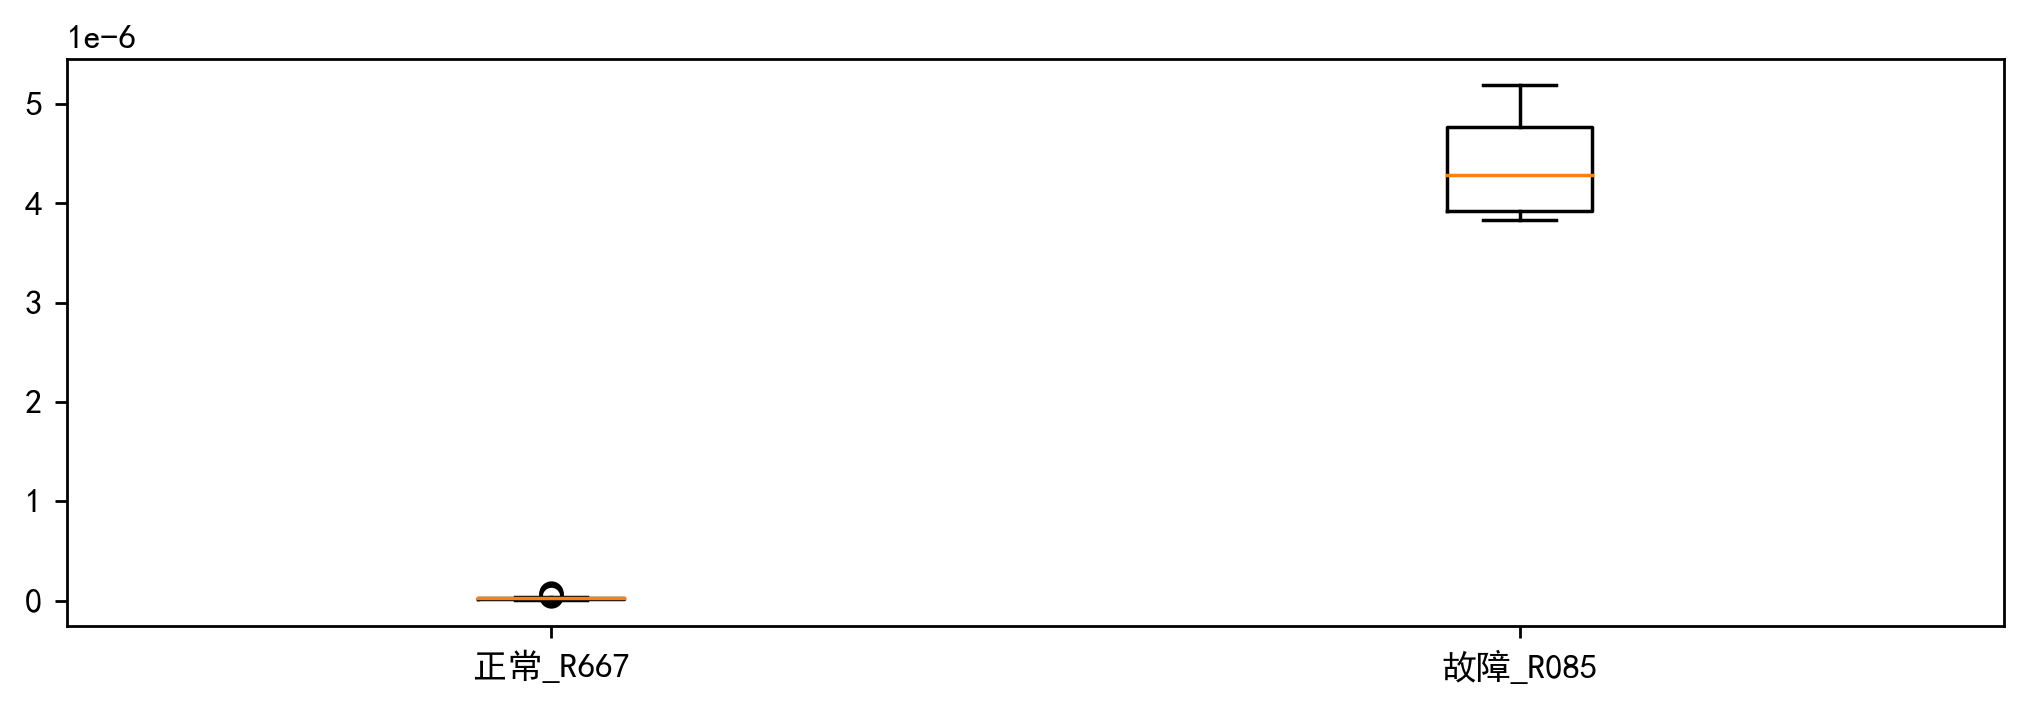

In [16]:
joint=1
motion=7
stage=3
fea=1
index=convert_index(joint,motion,stage,fea)
print(index)

fea_std=np.load(machine_std+'_电流.npz')['rotate_feas']
fea_std=fea_std.reshape(fea_std.shape[0],-1)[:,index]
fea_test=np.load(machine_test+'_电流.npz')['rotate_feas']
fea_test=fea_test.reshape(fea_test.shape[0],-1)[:,index]


plt.figure(figsize=(10,3),dpi=250)
plt.boxplot([fea_std,fea_test], labels = [machine_std,machine_test])
plt.show()

In [17]:
np.abs(np.mean(fea_test)-np.mean(fea_std))/np.abs(np.mean(fea_std))

160.06308092908384

In [20]:
fea_std=np.load(machine_std+'_电流.npz')['rotate_feas']
fea_std=fea_std.reshape(fea_std.shape[0],-1)
print(fea_std.shape)
fea_std=np.mean(fea_std,axis=0)
print(fea_std.shape)

(23, 1296)
(1296,)


In [21]:
fea_test=np.load(machine_test+'_电流.npz')['rotate_feas']
fea_test=fea_test.reshape(fea_test.shape[0],-1)
fea_test=np.mean(fea_test,axis=0)
print(fea_test.shape)

(1296,)


In [22]:
rate=np.abs(fea_test-fea_std)/np.abs(fea_std)
rate[180]

160.06308092908384

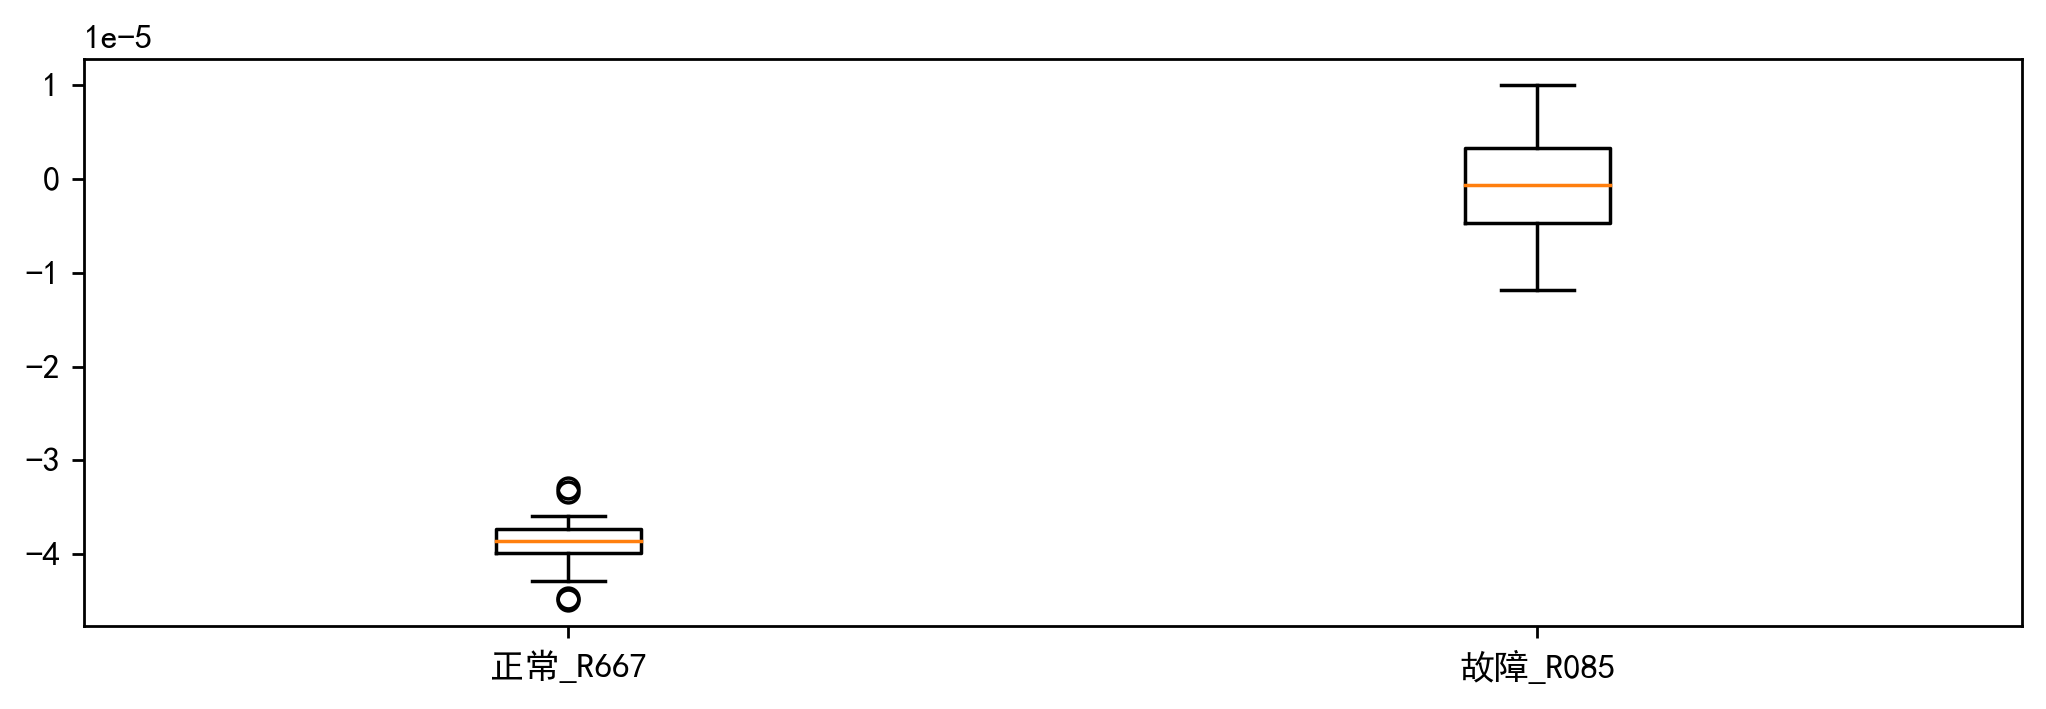

In [18]:
joint=4
motion=1
stage=3
fea=4
index=convert_index(joint,motion,stage,fea)

fea_std=np.load(machine_std+'_电流.npz')['rotate_feas']
fea_std=fea_std.reshape(fea_std.shape[0],-1)[:,index]
fea_test=np.load(machine_test+'_电流.npz')['rotate_feas']
fea_test=fea_test.reshape(fea_test.shape[0],-1)[:,index]

plt.figure(figsize=(10,3),dpi=250)
plt.boxplot([fea_std,fea_test], labels = [machine_std,machine_test])
plt.show()

In [19]:
np.abs(np.mean(fea_test)-np.mean(fea_std))/np.abs(np.mean(fea_std))

0.9797064398217421